# MIGUEL FRUTOS - INDIVIDUAL PROJECT
# CUSTOMER SEGMENTATION - CAR LOANS PORTFOLIO

**TASK SCOPE**

Risk Based Segmentation (RBS) to give Credit Professionals a better fix for Car Loans.

**OBJECTIVE** 

Create a Python class to automate the RBS:
1. Identify potential Segments --> Based on **sharing missing values**
2. Identify potential Segments --> Based on **Level of Risk**

Target Variable would be "BUCKET", as professor Manoel suggested, to simplify the exercise, we should transform the variable from "Number of unpaid installements at this reporting" to "Low Risk = 0 & High Risk > 1".

**LIBRARIES**

In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import date, timedelta
import re
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

**IMPORT FILE WITH CLASSES**

To import the .py file, basically, we just have to use the following command in the cell. And the .py file has to be in the same directory.

In [319]:
# %load CLASSES
#!/usr/bin/env python3
"""
Created on Tue Aug 17 20:20:19 2021

@author: miguelfrutossoriano
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 25 13:05:59 2021

@author: miguelfrutossoriano. ie
"""

class EDA ():
    def __init__(self,target,data):
        self.target = target
        self.data = data
    def missing_values_percentage(self):
        """Return the % of missing values for each pd.series inside the Dataframe"""
        missing_values_percentage = 100*self.data.isnull().sum()/self.data.isnull().count()
        return (missing_values_percentage[missing_values_percentage > 0])   
    def missing_values(self):
        """Return the features that have missing values and the number of those"""
        missing_values = self.data.isnull().sum()
        return (missing_values[missing_values > 0])

    
class Prep ():
    def __init__(self,target,data): 
        self.target = target
        self.data = data
    def numerical_features(self):
        """Numerical_variables function separates the numerical features except the target one"""
        numerical_features = set(self.data.select_dtypes(include=['number'])) - set([self.target]) #not include the target one
        return numerical_features
    def categorical_features(self):
        """Categorical_variables function separates the non-numerical features except the target one"""
        categorical_features = set(self.data.select_dtypes(exclude=['number'])) - set([self.target]) #not include the target one
        return categorical_features
    def incomplete_features(self):
        """Get the features with nulls inside"""
        incomplete_features = []  # Create an empty array
        for column_name in self.data.columns:
            if self.data[column_name].isna().any():
                incomplete_features.append(column_name)  
        return incomplete_features
    def numerical_features_na (self):
        """Numerical features with missing values"""
        numerical_features_na = self.numerical_features().intersection(self.incomplete_features())
        return numerical_features_na
    def categorical_features_na (self):
        """Categorical features with missing values"""
        categorical_features_na = self.categorical_features().intersection(self.incomplete_features())
        return categorical_features_na
    def cat_imputer (self):
        """Missing categorical values are imputed with SimpleImputer from sklearn (univariable - most frequent)"""
        imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
        imputed = imputer.fit_transform(self.data[self.categorical_features_na()].values)
        categorical_imputed = pd.DataFrame(imputed, columns=self.categorical_features_na())
        return categorical_imputed
    def num_imputer (self):
        """Missing numerical values are imputed with KNN Imputer from sklearn (multivariable - 5 neighbors)"""
        imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
        imputed = imputer.fit_transform(data[self.numerical_features_na()].values)
        numerical_imputed = pd.DataFrame(imputed, columns=self.numerical_features_na())
        return numerical_imputed
    def cat_num_imputer_concat (self):
        """Missing categorical values are imputed with SimpleImputer from sklearn (univariable - most frequent)
        Missing numerical values are imputed with KNN Imputer from sklearn (multivariable - 5 neighbors)
        Place the numerical & categorical NOT imputed in a separate dataframe and concatenate all in the next step"""
        imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
        imputed = imputer.fit_transform(self.data[self.categorical_features_na()].values)
        categorical_imputed = pd.DataFrame(imputed, columns=self.categorical_features_na())
        
        imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
        imputed = imputer.fit_transform(self.data[self.numerical_features_na()].values)
        numerical_imputed = pd.DataFrame(imputed, columns=self.numerical_features_na())
        
        numerical_complete = pd.DataFrame(self.data[list(self.numerical_features().difference(self.numerical_features_na()))])
        categorical_complete = pd.DataFrame(self.data[list(self.categorical_features().difference(self.categorical_features_na()))])
        
        data = pd.concat([numerical_imputed.reset_index(drop=True),
                   numerical_complete.reset_index(drop=True),
                   categorical_imputed.reset_index(drop=True),
                   categorical_complete.reset_index(drop=True),
                   pd.DataFrame(self.data[self.target].values, columns=[target])], axis =1)
        return data
    def scaling(self):
        """Scaling numerical features with MinMaxScaler from sklearn"""
        mm_scaler = preprocessing.MinMaxScaler()
        self.data[list(self.numerical_features)] = mm_scaler.fit_transform(self.data[list(self.numerical_features)])




In [320]:
class EDA ():
    def __init__(self,target,data):
        self.target = target
        self.data = data
    def missing_values_percentage(self):
        """Return the % of missing values for each pd.series inside the Dataframe"""
        missing_values_percentage = 100*self.data.isnull().sum()/self.data.isnull().count()
        return (missing_values_percentage[missing_values_percentage > 0])   
    def missing_values(self):
        """Return the features that have missing values and the number of those"""
        missing_values = self.data.isnull().sum()
        return (missing_values[missing_values > 0])

    def missing_not_at_random(self, input_vars=[] ): 
        null_data = self.data[self.data.isnull().any(axis=1)]
        null_data_zeros_and_ones = null_data.notnull().astype('int') #Replace all non-Nan entries with 1 and all NaN with O
        MNAR_correlation = null_data_zeros_and_ones.corr()
        if input_var ==[]: 
            input_var = list(data.columns.values)

        MNAR_correlation = data[input_vars].copy()

        MNAR =[]

        pos_corr = 0.50
        neg_corr = -0.50


        for j in range(i):
            if abs(MNAR_correlation.iloc[i,j]) > pos_corr or (MNAR_correlation.iloc[i,j])<neg_corr:
                colname = MNAR_correlation.columns[j]
                MNAR.append(colname)
        return MNAR        
        


    
class Prep ():
    def __init__(self,target,data): 
        self.target = target
        self.data = data
    def numerical_features(self):
        """Numerical_variables function separates the numerical features except the target one"""
        numerical_features = set(self.data.select_dtypes(include=['number'])) - set([self.target]) #not include the target one
        return numerical_features
    def categorical_features(self):
        """Categorical_variables function separates the non-numerical features except the target one"""
        categorical_features = set(self.data.select_dtypes(exclude=['number'])) - set([self.target]) #not include the target one
        return categorical_features
    def incomplete_features(self):
        """Get the features with nulls inside"""
        incomplete_features = []  # Create an empty array
        for column_name in self.data.columns:
            if self.data[column_name].isna().any():
                incomplete_features.append(column_name)  
        return incomplete_features
    def numerical_features_na (self):
        """Numerical features with missing values"""
        numerical_features_na = self.numerical_features().intersection(self.incomplete_features())
        return numerical_features_na
    def categorical_features_na (self):
        """Categorical features with missing values"""
        categorical_features_na = self.categorical_features().intersection(self.incomplete_features())
        return categorical_features_na
    def cat_imputer (self):
        """Missing categorical values are imputed with SimpleImputer from sklearn (univariable - most frequent)"""
        imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
        imputed = imputer.fit_transform(self.data[self.categorical_features_na()].values)
        categorical_imputed = pd.DataFrame(imputed, columns=self.categorical_features_na())
        return categorical_imputed
    def num_imputer (self):
        """Missing numerical values are imputed with KNN Imputer from sklearn (multivariable - 5 neighbors)"""
        imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
        imputed = imputer.fit_transform(data[self.numerical_features_na()].values)
        numerical_imputed = pd.DataFrame(imputed, columns=self.numerical_features_na())
        return numerical_imputed
    def cat_num_imputer_concat (self):
        """Missing categorical values are imputed with SimpleImputer from sklearn (univariable - most frequent)
        Missing numerical values are imputed with KNN Imputer from sklearn (multivariable - 5 neighbors)
        Place the numerical & categorical NOT imputed in a separate dataframe and concatenate all in the next step"""
        imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
        imputed = imputer.fit_transform(self.data[self.categorical_features_na()].values)
        categorical_imputed = pd.DataFrame(imputed, columns=self.categorical_features_na())
        
        imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
        imputed = imputer.fit_transform(self.data[self.numerical_features_na()].values)
        numerical_imputed = pd.DataFrame(imputed, columns=self.numerical_features_na())
        
        numerical_complete = pd.DataFrame(self.data[list(self.numerical_features().difference(self.numerical_features_na()))])
        categorical_complete = pd.DataFrame(self.data[list(self.categorical_features().difference(self.categorical_features_na()))])
        
        data = pd.concat([numerical_imputed.reset_index(drop=True),
                   numerical_complete.reset_index(drop=True),
                   categorical_imputed.reset_index(drop=True),
                   categorical_complete.reset_index(drop=True),
                   pd.DataFrame(self.data[self.target].values, columns=[target])], axis =1)
        return data
    def scaling(self):
        """Scaling numerical features with MinMaxScaler from sklearn"""
        mm_scaler = preprocessing.MinMaxScaler()
        self.data[list(self.numerical_features)] = mm_scaler.fit_transform(self.data[list(self.numerical_features)])




CLASSES FOR THIS PROJECT:
 - EDA(): Data Exploration, Data Cleaning.
 - Prep(): Data Preparation (input missing,scale...)

The purpose of these three classes is to standarize and do a more an agile project, as so... specific or too simple code lines are not compile under this classes.

# DATA UNDERSTANDING

In [321]:
dic = pd.read_excel('Data_Dictionary_Modeling_Task.xlsx')

In [322]:
dic

,Column name,Description
0,Reporting date,Last working day in month
1,Account Number,Loan Identification Number
2,Customer ID,Customer Identification Number in Credit Agricole
3,Program Name,Name of program under car loans product
4,Loan Open Date,Date of opening the loan
5,Expected Close Date,The date at which the loan should be closed (e...
6,Original Booked amount,Loan Amount that the customer takes
7,Outstanding,Remaining amount of the loan that is not paid ...
8,Bucket,Number of unpaid installements at this reporti...
9,Sex,Customer's gender as per the national ID


Based on the description we can differenciate the following categories:<br>
    <br>
1) LOAN DATA RELATED<br>
1.1 - Loan Open Date<br>
1.2 - Expected Close Date<br>
1.3 - Original Booked Amount<br>
1.4 - Outstanding<br>
1.5 - Bucket<br>
1.6 - Account Number<br>
1.7 - Program Name<br>
1.8 - Car Type<br>
1.9 - Reporting Date<br>
<br>
<br>
2) CUSTOMER DATA RELATED<br>
2.1 - Customer ID<br>
2.2 - Sex<br>
2.3 - Customer Open Date<br>
2.4 - Birth date<br>
2.5 - Profession<br>

In [323]:
data = pd.read_excel('AUTO_LOANS_DATA.xlsx') #Data = Whole Population

In [324]:
data.info() #Explore the features, missing values, dtypes and number of observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900860 entries, 0 to 900859
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   REPORTING_DATE          900860 non-null  datetime64[ns]
 1   ACCOUNT_NUMBER          900860 non-null  int64         
 2   CUSTOMER_ID             900860 non-null  int64         
 3   PROGRAM_NAME            900860 non-null  object        
 4   LOAN_OPEN_DATE          900860 non-null  datetime64[ns]
 5   EXPECTED_CLOSE_DATE     900860 non-null  datetime64[ns]
 6   ORIGINAL_BOOKED_AMOUNT  900860 non-null  float64       
 7   OUTSTANDING             900860 non-null  float64       
 8   BUCKET                  900860 non-null  int64         
 9   SEX                     896332 non-null  object        
 10  CUSTOMER_OPEN_DATE      900860 non-null  datetime64[ns]
 11  BIRTH_DATE              896327 non-null  datetime64[ns]
 12  PROFESSION              895302

# TARGET TO BINARY

In [325]:
target = 'BUCKET'

In [326]:
target

'BUCKET'

In [327]:
data.isnull().sum().sum()

26137

In [328]:
data[target] = np.where(data[target] > 0, 1, data[target])

As said before, Target Variable would be "BUCKET", as professor Manoel suggested, to simplify the exercise, we should transform the variable from "Number of unpaid installements at this reporting" to "Low Risk = 0 & High Risk > 1".

In our case, if we decide not to binarize the variable the following code will work in the same way (delete or not run the next cell). 

In [329]:
data['BUCKET'] = np.where(data.BUCKET > 0, 1, data.BUCKET) #numpy works faster!
#This would be another way --> data.loc[data.BUCKET > 1, 'BUCKET'] = 0

In [330]:
data.value_counts(target)

BUCKET
0    743348
1    157512
dtype: int64

# DATA CLEANING

In [331]:
EDA = EDA('BUCKET',data) #Create a new object with the class EDA

**DUPLICATES**

In [332]:
duplicate_rows_data = data[data.duplicated()] 
print('number of duplicate rows: ', duplicate_rows_data.shape)

number of duplicate rows:  (0, 14)


Notice that the observations have several repetitions! Entire duplicates are not detectables but after diving into the observations somo have small variations on *"REPORTING_DATE"* and *"OUTSTANDING"* variables, these make sense as the descriptions loans have been reported every after month and the outstanding changes. Remember the description of both variables:
- REPORTING_DATE : Last working day in month
- OUSTANDING : Remaining amount of the loan that is not paid
- BUCKET: IMPORTANT!!--> To mention that "BUCKET" risk changes through each reporting (but we have binarize it).

In [333]:
repetitive_data= data[data.duplicated(subset=data.columns.difference(['REPORTING_DATE','OUTSTANDING','BUCKET']))]

In [334]:
print('number of duplicate rows: ', repetitive_data.shape)

number of duplicate rows:  (861262, 14)


In [335]:
list_columns = data.columns.values.tolist()
list_columns.pop(0) #REPORTING_DATE
list_columns.pop(6) #OUTSTANDING
list_columns #without REPORTING_DATE & OUTSTANDING

['ACCOUNT_NUMBER',
 'CUSTOMER_ID',
 'PROGRAM_NAME',
 'LOAN_OPEN_DATE',
 'EXPECTED_CLOSE_DATE',
 'ORIGINAL_BOOKED_AMOUNT',
 'BUCKET',
 'SEX',
 'CUSTOMER_OPEN_DATE',
 'BIRTH_DATE',
 'PROFESSION',
 'CAR_TYPE']

In [336]:
#IMPORTANT: Keep the last one and drop the repetitive observations
data.sort_values(['REPORTING_DATE'],ascending=True)
data.drop_duplicates(subset=(list_columns),keep='last', inplace = True)

In [337]:
data.shape #remaining data

(59340, 14)

**OBJECTIVE 1 --> IDENTIFY SEGMENTS BY MISSING VALUES**
<br>
Our Business segmentation on missing values is a logical segmentation based on the data availability.

**MISSING VALUES**

In [338]:
EDA.missing_values_percentage()

SEX           0.778564
BIRTH_DATE    0.780249
PROFESSION    0.872936
CAR_TYPE      4.956185
dtype: float64

In [339]:
EDA.missing_values()
#Although most of the columns are related with Loan Data (category1)...
#...the features with missing values (3/4) are under the Customer Data category.

SEX            462
BIRTH_DATE     463
PROFESSION     518
CAR_TYPE      2941
dtype: int64

Separate from the dataset the rows with any missing values:
<br>
- Create a new dataframe called "null data"  that contains rows with missing data
- Create a new dataframe called "not_null_data" that contains rows without any data missing.

In [340]:
null_data = data[data.isnull().any(axis=1)]

In [341]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 143 to 900599
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   REPORTING_DATE          3390 non-null   datetime64[ns]
 1   ACCOUNT_NUMBER          3390 non-null   int64         
 2   CUSTOMER_ID             3390 non-null   int64         
 3   PROGRAM_NAME            3390 non-null   object        
 4   LOAN_OPEN_DATE          3390 non-null   datetime64[ns]
 5   EXPECTED_CLOSE_DATE     3390 non-null   datetime64[ns]
 6   ORIGINAL_BOOKED_AMOUNT  3390 non-null   float64       
 7   OUTSTANDING             3390 non-null   float64       
 8   BUCKET                  3390 non-null   int64         
 9   SEX                     2928 non-null   object        
 10  CUSTOMER_OPEN_DATE      3390 non-null   datetime64[ns]
 11  BIRTH_DATE              2927 non-null   datetime64[ns]
 12  PROFESSION              2872 non-null   obje

At this stage, we have two alternatives to get insights from missing data.
<br>
(1) Understanding the different categories of features (Loan & Customer Data Related).
<br>
(2) To answer the question: Why data is missing? We can analyze if the answer is in the correlation with other features.

**MISSING NOT AT RANDOM ANALYSIS**

Alternative (1)

In [342]:
#What professions have null values for SEX and BIRTH_DATE?.
null_data[(data.SEX.isnull()) & (data.BIRTH_DATE.isnull()) & data.PROFESSION.notnull()]
#The result is ZERO!... 

<ipython-input-342-1c1c127f2397>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  null_data[(data.SEX.isnull()) & (data.BIRTH_DATE.isnull()) & data.PROFESSION.notnull()]


,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE


Alternative (2)

In [343]:
#Replace all non-Nan entries with 1 and all NaN with O
null_data_zeros_and_ones = null_data.notnull().astype('int')

In [344]:
null_data_zeros_and_ones

,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE
143,1,1,1,1,1,1,1,1,1,1,1,1,1,0
247,1,1,1,1,1,1,1,1,1,1,1,1,1,0
308,1,1,1,1,1,1,1,1,1,1,1,1,1,0
350,1,1,1,1,1,1,1,1,1,1,1,1,1,0
363,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900138,1,1,1,1,1,1,1,1,1,0,1,0,0,1
900187,1,1,1,1,1,1,1,1,1,1,1,0,0,1
900300,1,1,1,1,1,1,1,1,1,0,1,0,0,1
900470,1,1,1,1,1,1,1,1,1,0,1,0,0,1


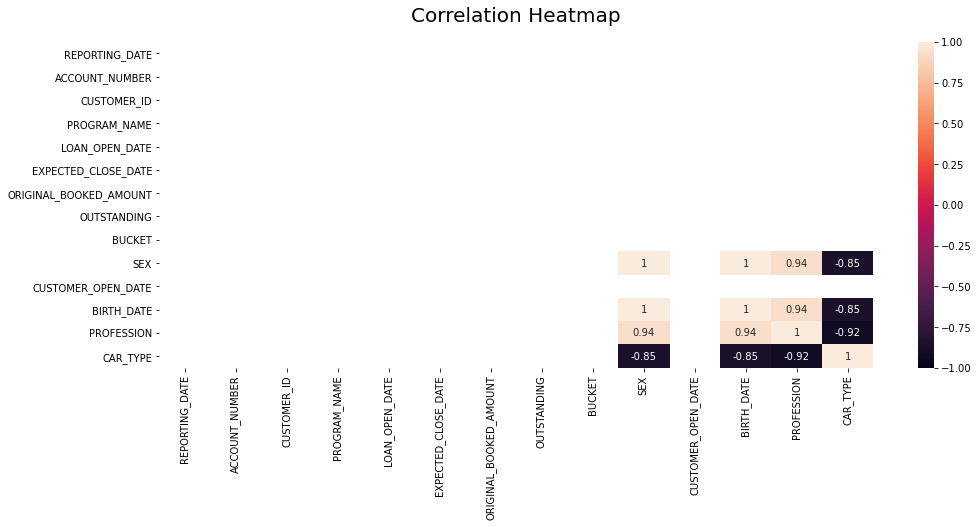

In [345]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(null_data_zeros_and_ones.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

In [346]:
input_vars = list(data.columns.values)
MNAR_correlation = data[input_vars].copy()
MNAR_correlation

,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE
143,2016-01-31,144,144,Auto Loans 50% Down Payment - Self Employed,2015-06-17,2017-06-03,140500.0,0.00,0,M,2013-05-14,1982-06-23,Contractor,NaN
247,2016-01-31,248,248,Auto Loans 50% Down Payment - Self Employed,2011-11-29,2016-12-03,70000.0,0.00,1,F,2011-11-16,1984-08-29,Business Man / Trader,NaN
308,2016-01-31,309,307,Auto Loans 50% Down Payment - Self Employed,2012-09-18,2017-09-03,65500.0,0.00,0,M,2012-09-12,1977-02-15,Shop Owner,NaN
350,2016-01-31,351,349,Auto Loans 50% Down Payment - Self Employed,2014-07-07,2018-07-03,44500.0,0.00,1,M,2014-07-02,1980-12-01,Company Owner,NaN
351,2016-01-31,352,350,Auto Loans 50% Down Payment - Self Employed,2013-06-12,2016-06-03,27000.0,4675.77,0,M,2007-05-30,1961-06-19,Company Owner,Chana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,Auto Loans 50% Down Payment - Employed,2018-09-27,2023-09-03,90000.0,78956.52,0,M,2018-09-16,1993-10-20,EMPLOYEE,Gelory
900856,2019-08-29,39597,38396,Auto Loans 50% Down Payment - Employed,2019-08-28,2024-09-03,92500.0,92826.06,0,F,2019-08-15,1977-09-01,Manager,Gelory
900857,2019-08-29,38016,36905,Pick Up and Small Trucks,2019-03-21,2021-03-03,140250.0,114919.47,0,M,2019-01-29,1980-01-05,Company Owner,NISSAN
900858,2019-08-29,38899,37739,Pick Up and Small Trucks,2019-06-26,2024-06-03,105000.0,101714.25,0,M,2019-05-28,1986-04-04,Company Owner,DFSK


In [347]:
input_vars = ['SEX','BIRTH_DATE','PROFESSION']
MNAR_correlation = null_data_zeros_and_ones[input_vars].corr()
MNAR_correlation

,SEX,BIRTH_DATE,PROFESSION
SEX,1.000000,0.998749,0.935326
BIRTH_DATE,0.998749,1.000000,0.936497
PROFESSION,0.935326,0.936497,1.000000


In [348]:

hello = ['hei','loco']
adios = ['hei','loco', 'tron']
try:
    print(x)
except: 
    print('variables are not')

variables are not


In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59340 entries, 143 to 900859
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   REPORTING_DATE          59340 non-null  datetime64[ns]
 1   ACCOUNT_NUMBER          59340 non-null  int64         
 2   CUSTOMER_ID             59340 non-null  int64         
 3   PROGRAM_NAME            59340 non-null  object        
 4   LOAN_OPEN_DATE          59340 non-null  datetime64[ns]
 5   EXPECTED_CLOSE_DATE     59340 non-null  datetime64[ns]
 6   ORIGINAL_BOOKED_AMOUNT  59340 non-null  float64       
 7   OUTSTANDING             59340 non-null  float64       
 8   BUCKET                  59340 non-null  int64         
 9   SEX                     58878 non-null  object        
 10  CUSTOMER_OPEN_DATE      59340 non-null  datetime64[ns]
 11  BIRTH_DATE              58877 non-null  datetime64[ns]
 12  PROFESSION              58822 non-null  obj

In [350]:
    def missing_not_at_random(input_vars=[]): 
        null_data = data[data.isnull().any(axis=1)]
        null_data_zeros_and_ones = null_data.notnull().astype('int') #Replace all non-Nan entries with 1 and all NaN with O
        if input_vars ==[]: 
            input_vars = list(data.columns.values)
        
        try:        
            MNAR_correlation = null_data_zeros_and_ones[input_vars].corr()

        
            MNAR =[]

            pos_corr = 0.50
            neg_corr = -0.50

            for i in range(len(MNAR_correlation.columns)):
                for j in range(i):
                    if abs(MNAR_correlation.iloc[i,j]) > pos_corr or (MNAR_correlation.iloc[i,j])<neg_corr:
                        colname_i = MNAR_correlation.columns[j]
                        colname_j = MNAR_correlation.columns[i]
                        MNAR.append(colname_i)
                        MNAR.append(colname_j)
            MNAR = list(set(MNAR))
            if MNAR == []:
                print('Zero MNAR were found under these variables as there are not missing values OR just included one variable')
            else:
                print('MNAR Variables found: {}'.format(MNAR))
        except:
            print('Not valid "input_vars" argument, include a list with variables that are inside the dataframe')

In [351]:
missing_not_at_random(input_vars=['PROFESSION','SEX'])

MNAR Variables found: ['SEX', 'PROFESSION']


In [352]:
def missing_not_at_random_report():    
    features = list(data.columns)
    File_Segment = [x for x in features if x not in MNAR] #List Comprehensions are perfectly suited to making this sort of thing 
    print('Missing Not At Random Report - {} variables seem Missing Not at Random, there for we recomend: \n'.format(MNAR)),
    print('Thin File Segment Variables: {}\n'.format(File_Segment))
    print('Full File Segment Variables: {}\n'.format(features))

In [353]:
missing_not_at_random_report()

NameError: name 'MNAR' is not defined

In [ ]:
MNAR

Conclusion: 'SEX','BIRTH_DATE' and 'PROFESSION' are hightly correlated. 
<br> <br>
Assumption: Perhaps this observations are not coming from INDIVIDUALS but **CORPORATIONS** (MNAR).
<br> <br>
We should ask to the user whether or not we should the assumption is correct and if we should split the dataset (INDIVIDUALS and CORPORATIONS).

In [ ]:
Indi_Corp = str(input('(YES/NO Query)We´ve found that some Missing Not At Random data (MNAR) in our dataset. Our guess is that it could have the reason behind that the observations are from Corporations instead of Individuals, is this assumption correct?'))

As the User has respond 'YES'. We do understand that our dataset is distributed between (2) kind of Customers, my suggestion would be in another project to deploy the following models depending on our data availability:
<br>
1. Model for Individuals without NaN
2. Model for Individuals with NaN
3. Model for Corporations without NaN
4. Model for Corporations with NaN

In [354]:
Thin_File_Segment_Variable = [] # Create an empty array
for column_name in data.columns:
    if ~data[column_name].isnull().any():
        Thin_File_Segment_Variable.append(column_name)  # Include this feature in it
        print(column_name)


REPORTING_DATE
ACCOUNT_NUMBER
CUSTOMER_ID
PROGRAM_NAME
LOAN_OPEN_DATE
EXPECTED_CLOSE_DATE
ORIGINAL_BOOKED_AMOUNT
OUTSTANDING
BUCKET
CUSTOMER_OPEN_DATE


In [355]:
Full_File_Segment_Variable = []
for column_name in data.columns:
    Full_File_Segment_Variable.append(column_name)  # Include this feature in it
    print(column_name)

REPORTING_DATE
ACCOUNT_NUMBER
CUSTOMER_ID
PROGRAM_NAME
LOAN_OPEN_DATE
EXPECTED_CLOSE_DATE
ORIGINAL_BOOKED_AMOUNT
OUTSTANDING
BUCKET
SEX
CUSTOMER_OPEN_DATE
BIRTH_DATE
PROFESSION
CAR_TYPE


**OBJECTIVE 1 DONE!!**

# **DATA PREPARATION**

In [356]:
Prep = Prep('BUCKET',data)

Dates can be difficult to process with ML models. Our intention is first to understand the features (with dType datetime64[ns]) and the correlation they have with the others... if we can do so, we will be able to obtain an integer (much more interesting). 

In [357]:
data_dates = list(data.select_dtypes(include=['datetime64[ns]']))
data_dates

['REPORTING_DATE',
 'LOAN_OPEN_DATE',
 'EXPECTED_CLOSE_DATE',
 'CUSTOMER_OPEN_DATE',
 'BIRTH_DATE']

In [358]:
data['DAYS_LOAN_DURATION']=(data['EXPECTED_CLOSE_DATE'] - data['LOAN_OPEN_DATE']).dt.days
data['DAYS_CUSTOMER_LIFETIME']=(np.datetime64('today') - data['BIRTH_DATE']).dt.days
data['DAYS_CUSTOMER_RELATION']=(np.datetime64('today') - data['CUSTOMER_OPEN_DATE']).dt.days
data['DAYS_AFTER_THE_REPORT']=(np.datetime64('today') - data['REPORTING_DATE']).dt.days

Assumption: REPORTING_DATE feature, defined as "Last working day in month", doesn´t describe clearly the intention of the date... We assume that the meaning is that the information provided in the observation is frozen from that date. Next step, reach the user to confirm or reject our hypothesis.

In [359]:
data.value_counts('PROGRAM_NAME')

PROGRAM_NAME
Auto Loans 50% Down Payment - Self Employed                       14386
Auto Loans 50% Down Payment - Employed                            14230
Auto Loans 30% Down Payment - Employed                             9406
Auto Loans 40% Down Payment - Employed                             7533
Auto Loans 40% Down Payment - Self Employed                        5325
Auto Loans 30% Down Payment - Self Employed                        3331
Pick Up and Small Trucks                                           1488
Auto Loans Special Deals                                            953
Auto Loans Payroll Clients                                          729
Auto Loans 20% Down Payment - Employed                              606
Auto Loans Corporate Guarantee                                      463
Auto Loans 20% Down Payment - Self Employed                         294
Auto Loans Doctors - Employed                                       144
Auto Loans 50% Down Payment No Car Prohibition - Em

Digging into the information in the "PROGRAM_NAME" variable, here we can breakdown it into an interesting and readable structure:<br>
    - TYPE_OF_CAR <br>
    - PERCENTAGE_OF_DOWN_PAYMENT<br>
    - EMPLOYED/SELF-EMPLOYED<br>
    - SPECIAL_CONDITIONS<br>

In [360]:
data['TYPE_OF_CAR'] = data['PROGRAM_NAME'].str.extract('(Auto|Pick Up and Small Trucks)', expand = True)
data['PERCENTAGE_OF_DOWN_PAYMENT'] = data['PROGRAM_NAME'].str.extract('(\d\d)', expand = True)
data['EMPLOYED/SELF_EMPLOYED'] = data['PROGRAM_NAME'].str.extract('(Employed|Self Employed)', expand = True)
data['SPECIAL_CONDITIONS'] = data['PROGRAM_NAME'].str.extract('(Payroll Clients|Special Deals|Run Off|Corporate Guarantee|Doctors|Secured against CD|Used Cars|Fully Secured|No Car Prohibition)', expand = True)

In [361]:
#We want it as a numeric not str.
data['PERCENTAGE_OF_DOWN_PAYMENT'] =pd.to_numeric(data['PERCENTAGE_OF_DOWN_PAYMENT'])

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59340 entries, 143 to 900859
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   REPORTING_DATE              59340 non-null  datetime64[ns]
 1   ACCOUNT_NUMBER              59340 non-null  int64         
 2   CUSTOMER_ID                 59340 non-null  int64         
 3   PROGRAM_NAME                59340 non-null  object        
 4   LOAN_OPEN_DATE              59340 non-null  datetime64[ns]
 5   EXPECTED_CLOSE_DATE         59340 non-null  datetime64[ns]
 6   ORIGINAL_BOOKED_AMOUNT      59340 non-null  float64       
 7   OUTSTANDING                 59340 non-null  float64       
 8   BUCKET                      59340 non-null  int64         
 9   SEX                         58878 non-null  object        
 10  CUSTOMER_OPEN_DATE          59340 non-null  datetime64[ns]
 11  BIRTH_DATE                  58877 non-null  datetim

In [363]:
#Drop "SPECIAL_CONDITIONS" --> High number of missing values, inputting values can create inconsistent model.
#Drop date type columns --> Transformed into numerical type
data.drop(['SPECIAL_CONDITIONS'],axis = 1, inplace = True) 
data.drop(columns = ['PROGRAM_NAME','REPORTING_DATE','BIRTH_DATE', 'LOAN_OPEN_DATE','EXPECTED_CLOSE_DATE', 'CUSTOMER_OPEN_DATE'], inplace = True)

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59340 entries, 143 to 900859
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ACCOUNT_NUMBER              59340 non-null  int64  
 1   CUSTOMER_ID                 59340 non-null  int64  
 2   ORIGINAL_BOOKED_AMOUNT      59340 non-null  float64
 3   OUTSTANDING                 59340 non-null  float64
 4   BUCKET                      59340 non-null  int64  
 5   SEX                         58878 non-null  object 
 6   PROFESSION                  58822 non-null  object 
 7   CAR_TYPE                    56399 non-null  object 
 8   DAYS_LOAN_DURATION          59340 non-null  int64  
 9   DAYS_CUSTOMER_LIFETIME      58877 non-null  float64
 10  DAYS_CUSTOMER_RELATION      59340 non-null  int64  
 11  DAYS_AFTER_THE_REPORT       59340 non-null  int64  
 12  TYPE_OF_CAR                 59340 non-null  object 
 13  PERCENTAGE_OF_DOWN_PAYMENT  

**INPUT MISSING VALUES**<br>
Decided to fulfill missing values with imputers

In [365]:
numerical_features = Prep.numerical_features()
Prep.numerical_features()

{'ACCOUNT_NUMBER',
 'CUSTOMER_ID',
 'DAYS_AFTER_THE_REPORT',
 'DAYS_CUSTOMER_LIFETIME',
 'DAYS_CUSTOMER_RELATION',
 'DAYS_LOAN_DURATION',
 'ORIGINAL_BOOKED_AMOUNT',
 'OUTSTANDING',
 'PERCENTAGE_OF_DOWN_PAYMENT'}

In [366]:
categorical_features = Prep.categorical_features()
Prep.categorical_features()

{'CAR_TYPE', 'EMPLOYED/SELF_EMPLOYED', 'PROFESSION', 'SEX', 'TYPE_OF_CAR'}

In [367]:
incomplete_features = Prep.incomplete_features()
Prep.incomplete_features()

['SEX',
 'PROFESSION',
 'CAR_TYPE',
 'DAYS_CUSTOMER_LIFETIME',
 'PERCENTAGE_OF_DOWN_PAYMENT',
 'EMPLOYED/SELF_EMPLOYED']

In [368]:
numerical_features_na = Prep.numerical_features_na()
Prep.numerical_features_na()

{'DAYS_CUSTOMER_LIFETIME', 'PERCENTAGE_OF_DOWN_PAYMENT'}

In [369]:
categorical_features_na = Prep.categorical_features_na()
Prep.categorical_features_na()

{'CAR_TYPE', 'EMPLOYED/SELF_EMPLOYED', 'PROFESSION', 'SEX'}

In [370]:
#We can also apply this function to find the categorical features with missing data
missing_categorical =[var for var in data.columns if data [var].isnull().mean()>0 and data[var].dtypes=='O']
missing_categorical

['SEX', 'PROFESSION', 'CAR_TYPE', 'EMPLOYED/SELF_EMPLOYED']

In [371]:
#KNN Imputer - NUMERICAL
Prep.num_imputer()

,PERCENTAGE_OF_DOWN_PAYMENT,DAYS_CUSTOMER_LIFETIME
0,50.0,14317.0
1,50.0,13519.0
2,50.0,16271.0
3,50.0,14886.0
4,50.0,21991.0
...,...,...
59335,50.0,10180.0
59336,50.0,16073.0
59337,42.0,15217.0
59338,40.0,12936.0


In [372]:
#Simple Imputer - CATEGORICAL
Prep.cat_imputer()

,CAR_TYPE,EMPLOYED/SELF_EMPLOYED,SEX,PROFESSION
0,HYUNDAI,Self Employed,M,Contractor
1,HYUNDAI,Self Employed,F,Business Man / Trader
2,HYUNDAI,Self Employed,M,Shop Owner
3,HYUNDAI,Self Employed,M,Company Owner
4,Chana,Self Employed,M,Company Owner
...,...,...,...,...
59335,Gelory,Employed,M,EMPLOYEE
59336,Gelory,Employed,F,Manager
59337,NISSAN,Employed,M,Company Owner
59338,DFSK,Employed,M,Company Owner


In [373]:
data = Prep.cat_num_imputer_concat()

Finally, the result of imputing both: numerical and categorical, is now merged together in a single DataFrame, together with the target variable which has not been processed.

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59340 entries, 0 to 59339
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERCENTAGE_OF_DOWN_PAYMENT  59340 non-null  float64
 1   DAYS_CUSTOMER_LIFETIME      59340 non-null  float64
 2   ACCOUNT_NUMBER              59340 non-null  int64  
 3   ORIGINAL_BOOKED_AMOUNT      59340 non-null  float64
 4   DAYS_LOAN_DURATION          59340 non-null  int64  
 5   CUSTOMER_ID                 59340 non-null  int64  
 6   OUTSTANDING                 59340 non-null  float64
 7   DAYS_CUSTOMER_RELATION      59340 non-null  int64  
 8   DAYS_AFTER_THE_REPORT       59340 non-null  int64  
 9   CAR_TYPE                    59340 non-null  object 
 10  EMPLOYED/SELF_EMPLOYED      59340 non-null  object 
 11  SEX                         59340 non-null  object 
 12  PROFESSION                  59340 non-null  object 
 13  TYPE_OF_CAR                 593

Check that the missing values are not anymore missing but imputed.

In [375]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59340 entries, 0 to 59339
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERCENTAGE_OF_DOWN_PAYMENT  59340 non-null  float64
 1   DAYS_CUSTOMER_LIFETIME      59340 non-null  float64
 2   ACCOUNT_NUMBER              59340 non-null  int64  
 3   ORIGINAL_BOOKED_AMOUNT      59340 non-null  float64
 4   DAYS_LOAN_DURATION          59340 non-null  int64  
 5   CUSTOMER_ID                 59340 non-null  int64  
 6   OUTSTANDING                 59340 non-null  float64
 7   DAYS_CUSTOMER_RELATION      59340 non-null  int64  
 8   DAYS_AFTER_THE_REPORT       59340 non-null  int64  
 9   CAR_TYPE                    59340 non-null  object 
 10  EMPLOYED/SELF_EMPLOYED      59340 non-null  object 
 11  SEX                         59340 non-null  object 
 12  PROFESSION                  59340 non-null  object 
 13  TYPE_OF_CAR                 593

# MODEL

**OBJECTIVE 2** - Identify potential Segments --> Based on Level of Risk

In [409]:
#Attempt to get the CATEGORICAL variables Splitted through decision tree model and mean_encoding with the target variable
for column in data [categorical_features]:
    new = data[[column,target]].copy()
    mean_encoded_subject = new.groupby([column])[target].mean().to_dict()
    new['SubjectName'] =  new[column].map(mean_encoded_subject)
    X = new['SubjectName']
    Y = new[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
    X_train= X_train.values.reshape(-1, 1)
    Y_train= Y_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X_train, Y_train)
    threshold = clf.tree_.threshold
    group1 = new.loc[new['SubjectName']<=threshold[0],column].unique()
    print(group1)
    group2 = new.loc[new['SubjectName']>threshold[0],column].unique()
    print(group2)

['HYUNDAI' 'CHEVROLET' 'LADA' 'NISSAN' 'KIA' 'MITSUBISHI' 'RENAULT'
 'TOYOTA' 'JEEP' 'Gelory' 'FORD' 'DAIHATSU' 'Citroen' 'BMW' 'OPEL' 'BYD'
 'VOLKSWAGEN' 'SEAT' 'FIAT' 'PROTON' 'Peugeot' 'Jack' 'Changan' 'MERCEDES'
 'CHERY' 'MAZDA' 'SUBARU' 'BAIC' 'Isuzu' 'VOLVO' 'CARRY' 'HONDA'
 'Ssang Yong' 'MG' 'HAIMA' 'CHANGY' 'Faw' 'Zoty' 'DFSK' 'HAWTAI' 'FLORIDA'
 'VICTORY']
['Chana' 'Speranza' 'GELY' 'Brilliance' 'SUZUKI' 'SKODA' 'Saipa' 'Livan'
 'Great Wall' 'Kenbo' 'Mahindra' 'AUDI' 'MABLE' 'ZEMEX' 'MINI' 'SAWEAST'
 'Dodge' 'JAGUAR']
['Employed']
['Self Employed']
['Company Owner' 'EMPLOYEE' 'Manager' 'ENGINEER' 'DOCTOR'
 'Instructor / Teacher' 'TOUR LEADER' 'RELIGION PERSON'
 'Accountant - Employee' 'RETIRED' 'PROFESSORS' 'SECRETARY' 'PHARMACIST'
 'Hostess' 'Bazaar Shop Owner' 'BANKER' 'Car / Boat Agency / Deale'
 'CAE - Current Staff' 'Craftsman' 'CHEMIST' 'Pilot' 'Consultant'
 'Police Officer' 'Politician' 'CAE Ex-Staff Less Than 10' 'PUBLISHER']
['Contractor' 'Business Man / Trader' 'Shop

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59340 entries, 0 to 59339
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PERCENTAGE_OF_DOWN_PAYMENT  59340 non-null  float64
 1   DAYS_CUSTOMER_LIFETIME      59340 non-null  float64
 2   ACCOUNT_NUMBER              59340 non-null  int64  
 3   ORIGINAL_BOOKED_AMOUNT      59340 non-null  float64
 4   DAYS_LOAN_DURATION          59340 non-null  int64  
 5   CUSTOMER_ID                 59340 non-null  int64  
 6   OUTSTANDING                 59340 non-null  float64
 7   DAYS_CUSTOMER_RELATION      59340 non-null  int64  
 8   DAYS_AFTER_THE_REPORT       59340 non-null  int64  
 9   CAR_TYPE                    59340 non-null  object 
 10  EMPLOYED/SELF_EMPLOYED      59340 non-null  object 
 11  SEX                         59340 non-null  object 
 12  PROFESSION                  59340 non-null  object 
 13  TYPE_OF_CAR                 593

In [379]:
#from category_encoders import TargetEncoder

In [380]:
#categorical_features = set(data.select_dtypes(exclude=['number'])) - set([target])
#df['Animal Encoded'] = encoder.fit_transform(df[categorical_features], df['Target'])

In [381]:
data.value_counts('TYPE_OF_CAR')

TYPE_OF_CAR
Auto                        57852
Pick Up and Small Trucks     1488
dtype: int64

In [411]:
def find_segment_split(candidate,target,input_vars = []):
    
    #Create a list with candidate,target and input_vars
    input_vars.append(candidate)
    input_vars.append(target)
    lista = input_vars
    
    #Isolate the varibles of the dataframe with the created list
    new_dataframe = data[lista].copy()
    
    #Categorical and numerical features of our new datafram
    categorical_features = list(set(new_dataframe.select_dtypes(exclude=['number'])) - set([target]))   
    numerical_features = list(set(new_dataframe.select_dtypes(include=['number'])) - set([target]))
    
    #SEGMENTATION STRATEGY : DECISION TREE btw candidate and target variable
    new = new_dataframe[[candidate,target]].copy()
    
    result = any(x in candidate for x in categorical_features)
    
    #MEAN ENCODING - PURPOSE IS TO SPLIT CATEGORICAL VARIABLES IN TWO SEGMENTS
    #1. Create a new dataframe. "new".
    #2. Add new variable based on the corresponding target encoding.
    #3. Decision Tree algorithm to split the categorical variable in two.
    if result:
        mean_encoded_subject = new.groupby([candidate])[target].mean().to_dict()
        new['SubjectName'] =  new[candidate].map(mean_encoded_subject)
        X = new['SubjectName']
        Y = new[target]
        #Adequate the dateframe to the shape of a runnable model.
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
        X_train= X_train.values.reshape(-1, 1)
        Y_train= Y_train.values.reshape(-1, 1)
        X_test = X_test.values.reshape(-1, 1)

        #Find the ideal threshold to split each variable based on their relation to the target.
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X_train, Y_train)   
        threshold = clf.tree_.threshold

        #Complete the two groups of categorical variables.
        group1 = new.loc[new['SubjectName']<=threshold[0],column].unique()
        group2 = new.loc[new['SubjectName']>threshold[0],column].unique()
    
    else :  
        X = new[candidate]
        Y = new[target]
        #Adequate the dateframe to the shape of a runnable model.
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
        X_train= X_train.values.reshape(-1, 1)
        Y_train= Y_train.values.reshape(-1, 1)
        X_test = X_test.values.reshape(-1, 1)

        #Find the ideal threshold to split each variable based on their relation to the target.
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X_train, Y_train)   
        threshold = clf.tree_.threshold

        #Complete the two groups of categorical variables.
        group1 = new.loc[new[candidate]<=threshold[0],column].unique()
        group2 = new.loc[new[candidate]>threshold[0],column].unique()
        
    
    #Split between test and train.
    data_train, data_test = train_test_split(new_dataframe, test_size = 0.2, random_state = 42)
    
    #Seg 1 and Seg 2.
    data_train_seg1 = data_train[new_dataframe[candidate].isin(group1)]
    data_train_seg2 = data_train[new_dataframe[candidate].isin(group2)]
    data_test_seg1 = data_test[new_dataframe[candidate].isin(group1)]
    data_test_seg2 = data_test[new_dataframe[candidate].isin(group2)]
    
    #Target encoding the categorical variables except target and candidate
    categorical_features = list(set(new_dataframe.select_dtypes(exclude=['number'])) - set([target,candidate]))
    for column in new_dataframe[categorical_features]:
        mean_encoded_subject = new_dataframe.groupby([column])[target].mean().to_dict()
        new_dataframe[column] =  new_dataframe[column].map(mean_encoded_subject) 
    
    numerical_features = list(set(new_dataframe.select_dtypes(include=['number'])) - set([target]))
    
    #Full Model - Numerical_Features
    X_train = data_train[numerical_features]
    y_train = data_train[target]
    X_test = data_test[numerical_features]
    y_test = data_test[target]
    X_train = data_train[numerical_features]
    y_train = data_train[target]
    method = LogisticRegression(random_state=0)
    fitted_full_model = method.fit(X_train, y_train)
    y_pred = fitted_full_model.predict(X_test)
    
    # Full Model vs Seg 1 on Seg 1
    X_train_seg1 = data_train_seg1[numerical_features]
    y_train_seg1 = data_train_seg1[target]
    X_test_seg1 = data_test_seg1[numerical_features]
    y_test_seg1 = data_test_seg1[target]
    fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)
    y_pred_seg1 = fitted_model_seg1.predict(X_test_seg1)
    y_pred_seg1_fullmodel = fitted_full_model.predict(X_test_seg1)
    print("FEATURE:",candidate,
          "\nSEGMENT:",group1,
          "\nModel Developed on Seg 1 (train sample) applied on Seg 1 (test sample):\n",accuracy_score(y_test_seg1, y_pred_seg1))
    print("")
    print("FEATURE:",candidate,
          "\nSEGMENT:",group1,
          "\nModel Developed on Full Population (train sample) applied on Seg 1 (test sample):\n",accuracy_score(y_test_seg1, y_pred_seg1_fullmodel))
    
    #Full Model vs Seg 2 on Seg 2
    X_train_seg2 = data_train_seg2[numerical_features]
    y_train_seg2 = data_train_seg2[target]
    X_test_seg2 = data_test_seg2[numerical_features]
    y_test_seg2 = data_test_seg2[target]
    fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)
    y_pred_seg2 = fitted_model_seg2.predict(X_test_seg2)
    y_pred_seg2_fullmodel = fitted_full_model.predict(X_test_seg2)
    print("\n--------------------------------------------------------------------------------")
    print("\nFEATURE:",candidate,
          "\nSEGMENT:",group2,
          "\nModel Developed on Full Population (train sample) applied on Seg 2 (test sample):\n",accuracy_score(y_test_seg2, y_pred_seg2_fullmodel))
    print("")
    print("FEATURE:",candidate,
          "\nSEGMENT:",group2,
          "\nModel Developed on Seg 2 (train sample) applied on Seg 2 (test sample):\n",accuracy_score(y_test_seg2, y_pred_seg2))

In [412]:
find_segment_split(candidate='TYPE_OF_CAR',target='BUCKET',input_vars=['SEX','PROFESSION','DAYS_CUSTOMER_LIFETIME'])

UnboundLocalError: local variable 'column' referenced before assignment

In [410]:
print("MODEL - CATEGORICAL VARIABLES")

for column in data [categorical_features]:
    #MEAN ENCODING - PURPOSE IS TO SPLIT CATEGORICAL VARIABLES IN TWO SEGMENTS
    #1. Create a new dataframe. "new".
    #2. Add new variable based on the corresponding target mean.
    #3. Decision Tree algorithm to split the categorical variable in two.
    new = data[[column,target]].copy()
    mean_encoded_subject = new.groupby([column])[target].mean().to_dict()
    new['SubjectName'] =  new[column].map(mean_encoded_subject)
    X = new['SubjectName']
    Y = new[target]
    #Adequate the dateframe to the shape of a runnable model.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
    X_train= X_train.values.reshape(-1, 1)
    Y_train= Y_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    
    #Find the ideal threshold to split each variable based on their relation to the target.
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X_train, Y_train)   
    threshold = clf.tree_.threshold
    
    #Complete the two groups of categorical variables.
    group1 = new.loc[new['SubjectName']<=threshold[0],column].unique()
    group2 = new.loc[new['SubjectName']>threshold[0],column].unique()
    
    #Split between test and train.
    data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 42)
    
    #Seg 1 and Seg 2.
    data_train_seg1 = data_train[data[column].isin(group1)]
    data_train_seg2 = data_train[data[column].isin(group2)]
    data_test_seg1 = data_test[data[column].isin(group1)]
    data_test_seg2 = data_test[data[column].isin(group2)]
    
    #Full Model - Numerical_Features
    X_train = data_train[numerical_features]
    y_train = data_train[target]
    X_test = data_test[numerical_features]
    y_test = data_test[target]
    X_train = data_train[numerical_features]
    y_train = data_train[target]
    method = LogisticRegression(random_state=0)
    fitted_full_model = method.fit(X_train, y_train)
    y_pred = fitted_full_model.predict(X_test)
    
    # Full Model vs Seg 1 on Seg 1
    X_train_seg1 = data_train_seg1[numerical_features]
    y_train_seg1 = data_train_seg1[target]
    X_test_seg1 = data_test_seg1[numerical_features]
    y_test_seg1 = data_test_seg1[target]
    fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)
    y_pred_seg1 = fitted_model_seg1.predict(X_test_seg1)
    y_pred_seg1_fullmodel = fitted_full_model.predict(X_test_seg1)
    print("FEATURE:",column,
          "\nSEGMENT:",group1,
          "\nModel Developed on Seg 1 (train sample) applied on Seg 1 (test sample):\n",accuracy_score(y_test_seg1, y_pred_seg1))
    print("")
    print("FEATURE:",column,
          "\nSEGMENT:",group1,
          "\nModel Developed on Full Population (train sample) applied on Seg 1 (test sample):\n",accuracy_score(y_test_seg1, y_pred_seg1_fullmodel))
    
    #Full Model vs Seg 2 on Seg 2
    X_train_seg2 = data_train_seg2[numerical_features]
    y_train_seg2 = data_train_seg2[target]
    X_test_seg2 = data_test_seg2[numerical_features]
    y_test_seg2 = data_test_seg2[target]
    fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)
    y_pred_seg2 = fitted_model_seg2.predict(X_test_seg2)
    y_pred_seg2_fullmodel = fitted_full_model.predict(X_test_seg2)
    print("FEATURE:",column,
          "\nSEGMENT:",group2,
          "\nModel Developed on Full Population (train sample) applied on Seg 2 (test sample):\n",accuracy_score(y_test_seg2, y_pred_seg2_fullmodel))
    print("")
    print("FEATURE:",column,
          "\nSEGMENT:",group2,
          "\nModel Developed on Seg 2 (train sample) applied on Seg 2 (test sample):\n",accuracy_score(y_test_seg2, y_pred_seg2))
    
    
    

MODEL - CATEGORICAL VARIABLES


<ipython-input-410-5044b7666929>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-410-5044b7666929>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]


FEATURE: CAR_TYPE 
SEGMENT: ['HYUNDAI' 'CHEVROLET' 'LADA' 'NISSAN' 'KIA' 'MITSUBISHI' 'RENAULT'
 'TOYOTA' 'JEEP' 'Gelory' 'FORD' 'DAIHATSU' 'Citroen' 'BMW' 'OPEL' 'BYD'
 'VOLKSWAGEN' 'SEAT' 'FIAT' 'PROTON' 'Peugeot' 'Jack' 'Changan' 'MERCEDES'
 'CHERY' 'MAZDA' 'SUBARU' 'BAIC' 'Isuzu' 'VOLVO' 'CARRY' 'HONDA'
 'Ssang Yong' 'MG' 'HAIMA' 'CHANGY' 'Faw' 'Zoty' 'DFSK' 'HAWTAI' 'FLORIDA'
 'VICTORY'] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7223561168418008

FEATURE: CAR_TYPE 
SEGMENT: ['HYUNDAI' 'CHEVROLET' 'LADA' 'NISSAN' 'KIA' 'MITSUBISHI' 'RENAULT'
 'TOYOTA' 'JEEP' 'Gelory' 'FORD' 'DAIHATSU' 'Citroen' 'BMW' 'OPEL' 'BYD'
 'VOLKSWAGEN' 'SEAT' 'FIAT' 'PROTON' 'Peugeot' 'Jack' 'Changan' 'MERCEDES'
 'CHERY' 'MAZDA' 'SUBARU' 'BAIC' 'Isuzu' 'VOLVO' 'CARRY' 'HONDA'
 'Ssang Yong' 'MG' 'HAIMA' 'CHANGY' 'Faw' 'Zoty' 'DFSK' 'HAWTAI' 'FLORIDA'
 'VICTORY'] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7223561168418008


/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FEATURE: CAR_TYPE 
SEGMENT: ['Chana' 'Speranza' 'GELY' 'Brilliance' 'SUZUKI' 'SKODA' 'Saipa' 'Livan'
 'Great Wall' 'Kenbo' 'Mahindra' 'AUDI' 'MABLE' 'ZEMEX' 'MINI' 'SAWEAST'
 'Dodge' 'JAGUAR'] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7023411371237458

FEATURE: CAR_TYPE 
SEGMENT: ['Chana' 'Speranza' 'GELY' 'Brilliance' 'SUZUKI' 'SKODA' 'Saipa' 'Livan'
 'Great Wall' 'Kenbo' 'Mahindra' 'AUDI' 'MABLE' 'ZEMEX' 'MINI' 'SAWEAST'
 'Dodge' 'JAGUAR'] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.7023411371237458


<ipython-input-410-5044b7666929>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-410-5044b7666929>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: EMPLOYED/SELF_EMPLOYED 
SEGMENT: ['Employed'] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7276929541952655

FEATURE: EMPLOYED/SELF_EMPLOYED 
SEGMENT: ['Employed'] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7276929541952655


/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FEATURE: EMPLOYED/SELF_EMPLOYED 
SEGMENT: ['Self Employed'] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7060689363501798

FEATURE: EMPLOYED/SELF_EMPLOYED 
SEGMENT: ['Self Employed'] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.7060689363501798


<ipython-input-410-5044b7666929>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-410-5044b7666929>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: PROFESSION 
SEGMENT: ['Company Owner' 'EMPLOYEE' 'Manager' 'ENGINEER' 'DOCTOR'
 'Instructor / Teacher' 'TOUR LEADER' 'RELIGION PERSON'
 'Accountant - Employee' 'RETIRED' 'PROFESSORS' 'SECRETARY' 'PHARMACIST'
 'Hostess' 'Bazaar Shop Owner' 'BANKER' 'Car / Boat Agency / Deale'
 'CAE - Current Staff' 'Craftsman' 'CHEMIST' 'Pilot' 'Consultant'
 'Police Officer' 'Politician' 'CAE Ex-Staff Less Than 10' 'PUBLISHER'] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7219801095094424

FEATURE: PROFESSION 
SEGMENT: ['Company Owner' 'EMPLOYEE' 'Manager' 'ENGINEER' 'DOCTOR'
 'Instructor / Teacher' 'TOUR LEADER' 'RELIGION PERSON'
 'Accountant - Employee' 'RETIRED' 'PROFESSORS' 'SECRETARY' 'PHARMACIST'
 'Hostess' 'Bazaar Shop Owner' 'BANKER' 'Car / Boat Agency / Deale'
 'CAE - Current Staff' 'Craftsman' 'CHEMIST' 'Pilot' 'Consultant'
 'Police Officer' 'Politician' 'CAE Ex-Staff Less Than 10' 'PUBLISHER'] 
Model Developed on Full Population (train sample) applied o

<ipython-input-410-5044b7666929>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-410-5044b7666929>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]


FEATURE: SEX 
SEGMENT: ['M'] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7201597744360902

FEATURE: SEX 
SEGMENT: ['M'] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7201597744360902


/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FEATURE: SEX 
SEGMENT: ['F'] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.714243146603099

FEATURE: SEX 
SEGMENT: ['F'] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.714243146603099


<ipython-input-410-5044b7666929>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-410-5044b7666929>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-410-5044b7666929>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]


FEATURE: TYPE_OF_CAR 
SEGMENT: ['Pick Up and Small Trucks'] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7344827586206897

FEATURE: TYPE_OF_CAR 
SEGMENT: ['Pick Up and Small Trucks'] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7344827586206897


/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FEATURE: TYPE_OF_CAR 
SEGMENT: ['Auto'] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7169632060804975

FEATURE: TYPE_OF_CAR 
SEGMENT: ['Auto'] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.7169632060804975


In [209]:
print("MODEL - NUMERICAL VARIABLES")

for column in data [numerical_features]:
    #MEAN ENCODING - PURPOSE IS TO SPLIT CATEGORICAL VARIABLES IN TWO SEGMENTS
    #1. Create a new dataframe. "new".
    #2. Add new variable based on the corresponding target mean.
    #3. Decision Tree algorithm to split the categorical variable in two.
    new = data[[column,target]].copy()
    #mean_encoded_subject = new.groupby([column])[target].mean().to_dict()
    #new['SubjectName'] =  new[column].map(mean_encoded_subject)
    X = new[column]
    Y = new[target]
    #Adequate the dateframe to the shape of a runnable model.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 
    X_train= X_train.values.reshape(-1, 1)
    Y_train= Y_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    
    #Find the ideal threshold to split each variable based on their relation to the target.
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X_train, Y_train)   
    threshold = clf.tree_.threshold
    
    #Complete the two groups of categorical variables.
    group1 = new.loc[new[column]<=threshold[0],column].unique()
    group2 = new.loc[new[column]>threshold[0],column].unique()
    
    #Split between test and train.
    data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 42)
    
    #Seg 1 and Seg 2.
    data_train_seg1 = data_train[data[column].isin(group1)]
    data_train_seg2 = data_train[data[column].isin(group2)]
    data_test_seg1 = data_test[data[column].isin(group1)]
    data_test_seg2 = data_test[data[column].isin(group2)]
    
    #Full Model - Numerical_Features
    X_train = data_train[numerical_features]
    y_train = data_train[target]
    X_test = data_test[numerical_features]
    y_test = data_test[target]
    X_train = data_train[numerical_features]
    y_train = data_train[target]
    method = LogisticRegression(random_state=0)
    fitted_full_model = method.fit(X_train, y_train)
    y_pred = fitted_full_model.predict(X_test)
    
    # Full Model vs Seg 1 on Seg 1
    X_train_seg1 = data_train_seg1[numerical_features]
    y_train_seg1 = data_train_seg1[target]
    X_test_seg1 = data_test_seg1[numerical_features]
    y_test_seg1 = data_test_seg1[target]
    fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)
    y_pred_seg1 = fitted_model_seg1.predict(X_test_seg1)
    y_pred_seg1_fullmodel = fitted_full_model.predict(X_test_seg1)
    print("FEATURE:",column,
          "\nSEGMENT:",group1,
          "\nModel Developed on Seg 1 (train sample) applied on Seg 1 (test sample):\n",accuracy_score(y_test_seg1, y_pred_seg1))
    print("")
    print("FEATURE:",column,
          "\nSEGMENT:",group1,
          "\nModel Developed on Full Population (train sample) applied on Seg 1 (test sample):\n",accuracy_score(y_test_seg1, y_pred_seg1_fullmodel))
    
    #Full Model vs Seg 2 on Seg 2
    X_train_seg2 = data_train_seg2[numerical_features]
    y_train_seg2 = data_train_seg2[target]
    X_test_seg2 = data_test_seg2[numerical_features]
    y_test_seg2 = data_test_seg2[target]
    fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)
    y_pred_seg2 = fitted_model_seg2.predict(X_test_seg2)
    y_pred_seg2_fullmodel = fitted_full_model.predict(X_test_seg2)
    print("FEATURE:",column,
          "\nSEGMENT:",group2,
          "\nModel Developed on Full Population (train sample) applied on Seg 2 (test sample):\n",accuracy_score(y_test_seg2, y_pred_seg2_fullmodel))
    print("")
    print("FEATURE:",column,
          "\nSEGMENT:",group2,
          "\nModel Developed on Seg 2 (train sample) applied on Seg 2 (test sample):\n",accuracy_score(y_test_seg2, y_pred_seg2))

MODEL - NUMERICAL VARIABLES


<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: ACCOUNT_NUMBER 
SEGMENT: [  144   248   309 ... 33229 32478  4350] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7295824094604583

FEATURE: ACCOUNT_NUMBER 
SEGMENT: [  144   248   309 ... 33229 32478  4350] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7295824094604583


/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FEATURE: ACCOUNT_NUMBER 
SEGMENT: [35568 35543 36087 ... 39597 38016 38899] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.8218390804597702

FEATURE: ACCOUNT_NUMBER 
SEGMENT: [35568 35543 36087 ... 39597 38016 38899] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.8218390804597702


<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: ORIGINAL_BOOKED_AMOUNT 
SEGMENT: [ 70000.  65500.  44500. ...  87900.  41200. 113790.] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7328378238876845

FEATURE: ORIGINAL_BOOKED_AMOUNT 
SEGMENT: [ 70000.  65500.  44500. ...  87900.  41200. 113790.] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7328378238876845


/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FEATURE: ORIGINAL_BOOKED_AMOUNT 
SEGMENT: [140500. 390375. 134400. ... 158836. 321000. 219500.] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7505731315910132

FEATURE: ORIGINAL_BOOKED_AMOUNT 
SEGMENT: [140500. 390375. 134400. ... 158836. 321000. 219500.] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.7505731315910132


<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: PERCENTAGE_OF_DOWN_PAYMENT 
SEGMENT: [42.58468376 30.         40.         38.         42.         20.
 36.         34.         32.         28.        ] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7042963993738042

FEATURE: PERCENTAGE_OF_DOWN_PAYMENT 
SEGMENT: [42.58468376 30.         40.         38.         42.         20.
 36.         34.         32.         28.        ] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7042963993738042
FEATURE: PERCENTAGE_OF_DOWN_PAYMENT 
SEGMENT: [50. 46. 48. 44.] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7316554992645857

FEATURE: PERCENTAGE_OF_DOWN_PAYMENT 
SEGMENT: [50. 46. 48. 44.] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.7316554992645857


<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: DAYS_LOAN_DURATION 
SEGMENT: [ 717 1087 1088  726 1108 1086 1071 1072 1090 1105 1075 1080 1106 1078
 1085 1099 1084  713  711 1083  730  373 1079  732 1076 1101 1098 1074
  734  763 1069 1062 1070  712  410  721 1160  779 1100  715 1140  352
 1081  769  356 1103  768  704  714  537  342 1068  710  418 1077  409
  728  582  733  353  346  347  917  705 1094 1133  739  725  707  740
  731  709  340 1067 1136  357 1041 1163  706 1301 1089 1300 1092  360
 1082 1096  708 1107  729  414  358  735 1097 1142  703  766  781  374
  724  341 1057  691  903  350  778 1095 1130 1132  762  675  363 1146
 1102 1091  738  413 1131 1109  790 1155  722 1093  743  727  370 1045
  792 1043 1073  343 1233 1165  366  640  720  716  375  336  788  351
  371 1149  702  359  748 1039 1150  723 1129 1208 1112  783  364  801
 1138  349  339  227  742 1152 1134 1153  718 1283 1040  782  795  354
  701 1260 1126  361 1376 1011 1058  741  737  355 1137 1038  345  789
  736 1111  344 1373  433  368 1047  76

 2499 2204 2152 1720 2265 2107 1559 2260 2076] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7103455563774701

FEATURE: DAYS_LOAN_DURATION 
SEGMENT: [1831 1811 1457 1431 1413 1830 1808 1818 1803 1809 1802 1837 1442 1806
 1832 1816 1826 1834 1432 1440 1817 1820 1430 1829 1824 1805 1833 1822
 1812 1836 1804 1810 1801 1865 1823 1825 1861 1797 1459 1799 1835 1453
 1418 1860 1877 1819 1814 1813 1903 1450 1798 1821 1815 2331 1891 1449
 1438 1436 1452 1880 1448 1800 1807 1444 1882 1466 1872 1512 1892 1844
 1743 1445 1443 1899 1455 1441 1875 1859 1846 1446 1435 1776 1827 1451
 1464 1766 1465 1469 1864 1782 1456 1838 1874 1463 1867 1792 1479 1437
 1434 1499 1839 1439 1498 1881 1878 1793 1470 1471 1777 1849 1757 1828
 1524 1870 1845 1454 1869 1530 1868 1458 1769 1853 1501 1460 2259 1496
 1426 1447 1796 1404 1866 1890 1601 2033 1433 1876 1883 1762 1863 1468
 1893 1856 1788 1898 1862 1421 1509 1427 1473 1871 1854 1775 1740 1885
 1841 1495 1886 1780 1516 1535

<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: DAYS_CUSTOMER_LIFETIME 
SEGMENT: [14317. 13519. 16271. ... 11045. 10411. 10032.] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7092716818399617

FEATURE: DAYS_CUSTOMER_LIFETIME 
SEGMENT: [14317. 13519. 16271. ... 11045. 10411. 10032.] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7092716818399617
FEATURE: DAYS_CUSTOMER_LIFETIME 
SEGMENT: [21991. 18586. 18059. ... 19474. 19183. 23234.] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7366477272727273

FEATURE: DAYS_CUSTOMER_LIFETIME 
SEGMENT: [21991. 18586. 18059. ... 19474. 19183. 23234.] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.7366477272727273


<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: CUSTOMER_ID 
SEGMENT: [  144   248   307 ... 31235 31664  4307] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7274147596728242

FEATURE: CUSTOMER_ID 
SEGMENT: [  144   248   307 ... 31235 31664  4307] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7274147596728242


/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


FEATURE: CUSTOMER_ID 
SEGMENT: [34594 34573 35090 ... 38396 36905 37739] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.8115501519756839

FEATURE: CUSTOMER_ID 
SEGMENT: [34594 34573 35090 ... 38396 36905 37739] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.8115501519756839


<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]
/Users/miguelfrutossoriano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

FEATURE: OUTSTANDING 
SEGMENT: [ 0.0000e+00 -6.2230e+01  1.0000e-02 -2.5340e+01 -1.9650e+01 -8.2120e+01
 -1.1141e+02 -5.0300e+00 -1.4500e+00 -2.5680e+01 -4.0900e+00] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.9456219225005352

FEATURE: OUTSTANDING 
SEGMENT: [ 0.0000e+00 -6.2230e+01  1.0000e-02 -2.5340e+01 -1.9650e+01 -8.2120e+01
 -1.1141e+02 -5.0300e+00 -1.4500e+00 -2.5680e+01 -4.0900e+00] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.9456219225005352
FEATURE: OUTSTANDING 
SEGMENT: [  4675.77   1718.08 105073.5  ...  92826.06 114919.47 101714.25] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.7635125746838961

FEATURE: OUTSTANDING 
SEGMENT: [  4675.77   1718.08 105073.5  ...  92826.06 114919.47 101714.25] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.7635125746838961


<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]


FEATURE: DAYS_CUSTOMER_RELATION 
SEGMENT: [1242 1209 1236 1226 1206 1220 1170 1200 1240 1142 1149 1230 1215 1194
 1180 1184 1094 1103 1151 1083 1185 1222 1233 1208 1235 1150 1124 1229
 1248 1097 1086 1079 1241 1116 1067 1219 1075 1076 1039 1214 1165 1205
 1179 1037 1130 1191 1228 1237 1121 1216 1234 1144 1125 1117 1054 1074
 1167 1186 1157 1166 1030 1052 1024 1040 1089 1032 1199 1118 1033 1059
 1081 1249 1128 1013 1172 1193 1152 1055 1111 1051 1187 1132 1003  999
 1223 1048 1101 1095 1020 1072 1058 1009  981 1047 1143 1114 1213  963
 1034 1139  957 1011  996  949 1158 1122 1212 1153 1163  968  988  954
 1046 1082  939  926 1207  921  914 1096  982 1102 1131  922  940 1045
  919 1005  990 1100 1087 1159  960 1044 1031  998 1164 1038  936 1069
  950 1181 1023  971 1123  915 1053 1066  975 1026  887  904  918 1250
  886  878  913 1073 1247  964 1198 1178 1145  932 1060 1146  905 1002
  962 1202 1080  935 1177  941  942  894  925  912  920 1068  967  906
 1019 1017  877  984 1093  890  891

<ipython-input-209-fec411ad8dd2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg1 = data_train[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_seg2 = data_train[data[column].isin(group2)]
<ipython-input-209-fec411ad8dd2>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg1 = data_test[data[column].isin(group1)]
<ipython-input-209-fec411ad8dd2>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_seg2 = data_test[data[column].isin(group2)]


FEATURE: DAYS_AFTER_THE_REPORT 
SEGMENT: [1860 1829 1800 1768 1738 1709 1676 1648 1618 1587 1556 1527 1465 1495
 1436 1403 1374 1342 1311 1283 1254 1222 1191 1163 1130 1100 1069 1038
 1009  977  946  918  887  857  827  799  765  736] 
Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):
 0.7199462726662189

FEATURE: DAYS_AFTER_THE_REPORT 
SEGMENT: [1860 1829 1800 1768 1738 1709 1676 1648 1618 1587 1556 1527 1465 1495
 1436 1403 1374 1342 1311 1283 1254 1222 1191 1163 1130 1100 1069 1038
 1009  977  946  918  887  857  827  799  765  736] 
Model Developed on Full Population (train sample) applied on Seg 1 (test sample):
 0.7199462726662189
FEATURE: DAYS_AFTER_THE_REPORT 
SEGMENT: [2042 2013 1982 1954 1921 1892] 
Model Developed on Full Population (train sample) applied on Seg 2 (test sample):
 0.8484429065743945

FEATURE: DAYS_AFTER_THE_REPORT 
SEGMENT: [2042 2013 1982 1954 1921 1892] 
Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):
 0.8484429

In [ ]:
#text_representation = tree.export_text(clf)
#print(text_representation)